<a href="https://colab.research.google.com/github/dote7ant/Dimension_reduction_fSelection_anomalies_rules_analysis/blob/master/Associative_analysis_in_R_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# topic

## Introduction

### a. Defining the question.

Create association rules that will allow you to identify relationships between variables in the dataset. You will be required to provide insights for your analysis.

### b. Defining the metrics of success.

For this project to be successful we should aim to do the following:

1. Load the data.
2. Exploring the data. 
3. Finding rules.


### c. Understanding the context.





You are a Data analyst at Carrefour Kenya and are currently undertaking a project that will inform the marketing department on the most relevant marketing strategies that will result in the highest no. of sales (total price including tax). 

### d. Recording the Experimental design.

The following are the steps that we will take to conduct this project. They are listed below:


1. Loading the required libraries.
2. Loading the data set.
3. Exploratory analysis.
4. Solution implementation.
5. Conclusions and recommendations.




## 1. Reading the data and importing the required libraries.

In [4]:
# We first we install the required arules library 
install.packages("arules")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [6]:
# load arules library
library(arules)
# load the data 
url = "http://bit.ly/SupermarketDatasetII"
df <- read.transactions(url)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write


Warning message in asMethod(object):
“removing duplicated items in transactions”


## 2. Check the data.

In [15]:
# previewing our first 5 transactions
inspect(df[1:5])

    items                              
[1] {cheese,energy,                    
     drink,tomato,                     
     fat,                              
     flour,yams,cottage,               
     grapes,whole,                     
     juice,frozen,                     
     juice,low,                        
     mix,green,                        
     oil,                              
     shrimp,almonds,avocado,vegetables,
     smoothie,spinach,olive,           
     tea,honey,salad,mineral,          
     water,salmon,antioxydant,         
     weat,                             
     yogurt,green}                     
[2] {burgers,meatballs,eggs}           
[3] {chutney}                          
[4] {turkey,avocado}                   
[5] {bar,whole,                        
     mineral,                          
     rice,green,                       
     tea,                              
     water,milk,energy,                
     wheat}                            


In [10]:
# check type of data set
class(df)

[1] "transactions"
attr(,"package")
[1] "arules"

In [11]:
# find the column data types 
str(df)

Formal class 'transactions' [package "arules"] with 3 slots
  ..@ data       :Formal class 'ngCMatrix' [package "Matrix"] with 5 slots
  .. .. ..@ i       : int [1:23299] 1087 1614 1705 1732 1993 2101 2105 2358 2444 3463 ...
  .. .. ..@ p       : int [1:7502] 0 15 16 17 18 24 27 31 33 36 ...
  .. .. ..@ Dim     : int [1:2] 5729 7501
  .. .. ..@ Dimnames:List of 2
  .. .. .. ..$ : NULL
  .. .. .. ..$ : NULL
  .. .. ..@ factors : list()
  ..@ itemInfo   :'data.frame':	5729 obs. of  1 variable:
  .. ..$ labels: chr [1:5729] "&" "accessories" "accessories,antioxydant" "accessories,champagne,fresh" ...
  ..@ itemsetInfo:'data.frame':	0 obs. of  0 variables


Most of the columns are numeric with 4 of them being non numeric.

In [12]:
# find out how many rows and columns are present in the data set
dim(df)

[1] 7501 5729

## 3. Exploratory Data Analysis (EDA).

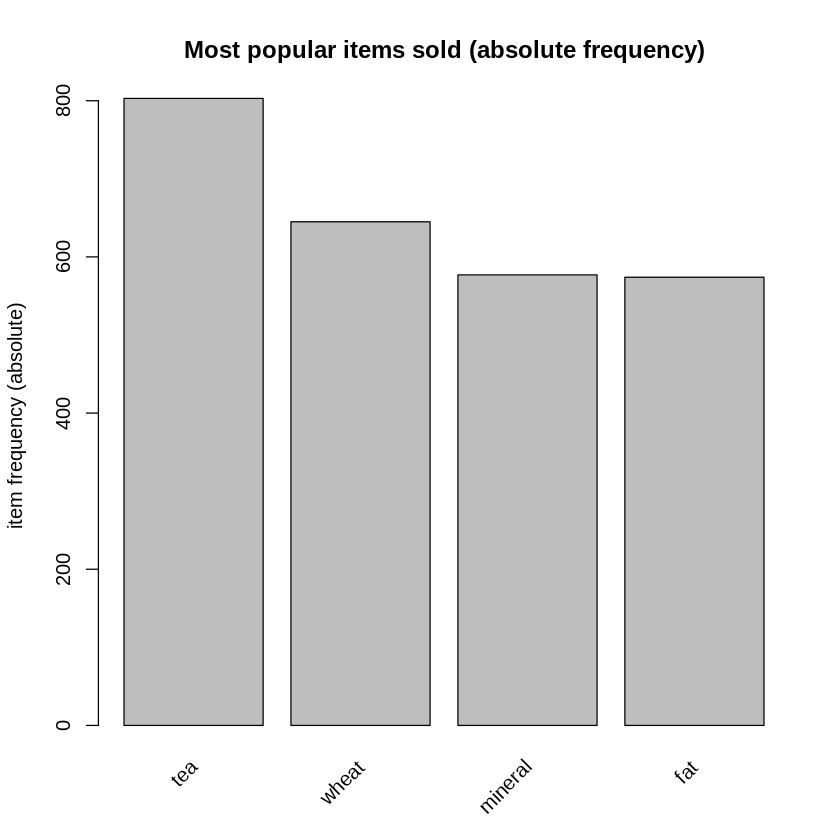

In [17]:
itemFrequencyPlot(
    df,
    topN=4, # Show top 4 items
    type="absolute", # absolute frequency instead of relative
    main="Most popular items sold (absolute frequency)"
)

## 4. Implementing the solution.

In [22]:
# run apriori function to get the rules
association.rules <- apriori(
    df, 
    parameter = list(
        supp = 0.005, # Minimum support level, frequency of items
        conf = 0.8 # Minimum confidence level
    )
)

association.rules <- sort(association.rules, by = 'support', decreasing = TRUE)
summary(association.rules)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.005      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 37 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[5729 item(s), 7501 transaction(s)] done [0.01s].
sorting and recoding items ... [73 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [21 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 21 rules

rule length distribution (lhs + rhs):sizes
 2  3 
12  9 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   2.000   2.000   2.429   3.000   3.000 

summary of quality measures:
    support           confidence        coverage             lift       
 Min.   :0.005066   Min.   :0.8125   Min.   :0.005066   Min.   : 9.341  
 1st Qu.:0.005999   1st Qu.:0.9583   1st Qu.:0.005999   1st Qu.:12.244  
 Median :0.006799   Median :1.0000   Median :0.006799   Median :13.068  
 Mean   :0.014366   Mean   :0.9698   Mean   :0.015154   Mean   :13.855  
 3rd Qu.:0.009065   3rd Qu.:1.0000   3rd Qu.:0.009065   3rd Qu.:13.514  
 Max.   :0.068391   Max.   :1.0000   Max.   :0.076523   Max.   :20.218  
     count      
 Min.   : 38.0  
 1st Qu.: 45.0  
 Median : 51.0  
 Mean   :107.8  
 3rd Qu.: 68.0  
 Max.   :513.0  

mining info:
 data ntransactions support confidence
   df          7501   0.005        0.8

In [23]:
# preview the rules
inspect(head(association.rules))

    lhs                rhs      support     confidence coverage    lift    
[1] {yogurt}        => {fat}    0.068390881 0.9447514  0.072390348 12.34596
[2] {fat}           => {yogurt} 0.068390881 0.8937282  0.076523130 12.34596
[3] {herb}          => {&}      0.030929209 1.0000000  0.030929209 20.21833
[4] {whole}         => {wheat}  0.018930809 0.9466667  0.019997334 11.00922
[5] {rice}          => {wheat}  0.012265031 0.9583333  0.012798294 11.14490
[6] {pepper,ground} => {&}      0.009065458 1.0000000  0.009065458 20.21833
    count
[1] 513  
[2] 513  
[3] 232  
[4] 142  
[5]  92  
[6]  68  


In [25]:
# arulesViz to enable plottings
install.packages("arulesViz")
require(arulesViz)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘gridExtra’, ‘bitops’, ‘zoo’, ‘foreach’, ‘viridis’, ‘gtools’, ‘caTools’, ‘lmtest’, ‘TSP’, ‘qap’, ‘gclus’, ‘dendextend’, ‘gplots’, ‘registry’, ‘hexbin’, ‘data.table’, ‘scatterplot3d’, ‘vcd’, ‘seriation’, ‘igraph’, ‘plotly’, ‘visNetwork’


Loading required package: arulesViz

Loading required package: grid

Registered S3 method overwritten by 'seriation':
  method         from 
  reorder.hclust gclus



To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



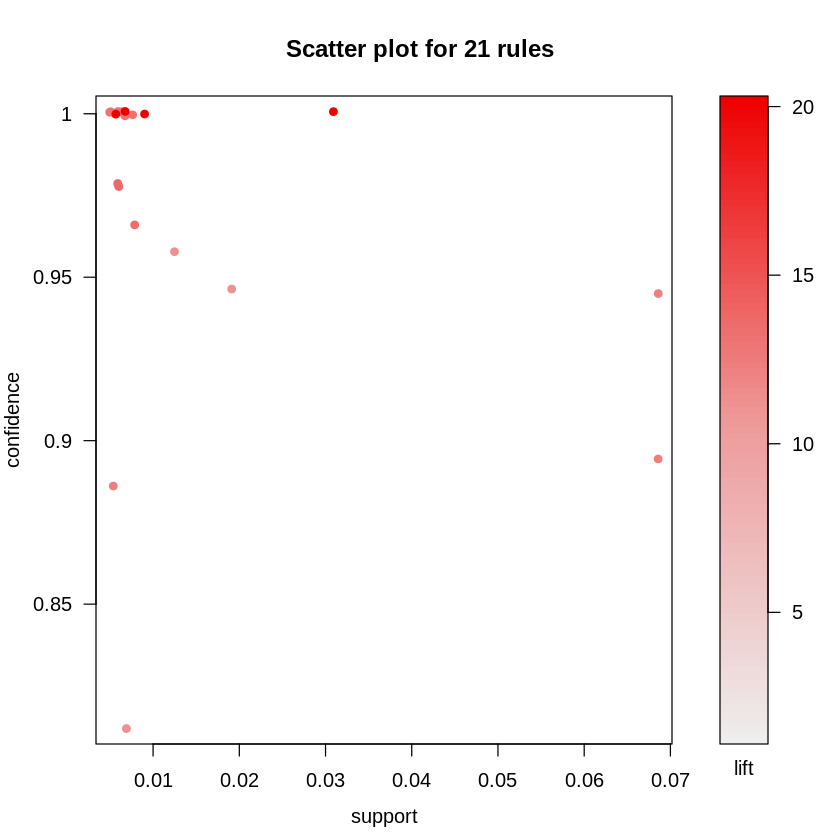

In [26]:
# plot the association rules
plot(association.rules)

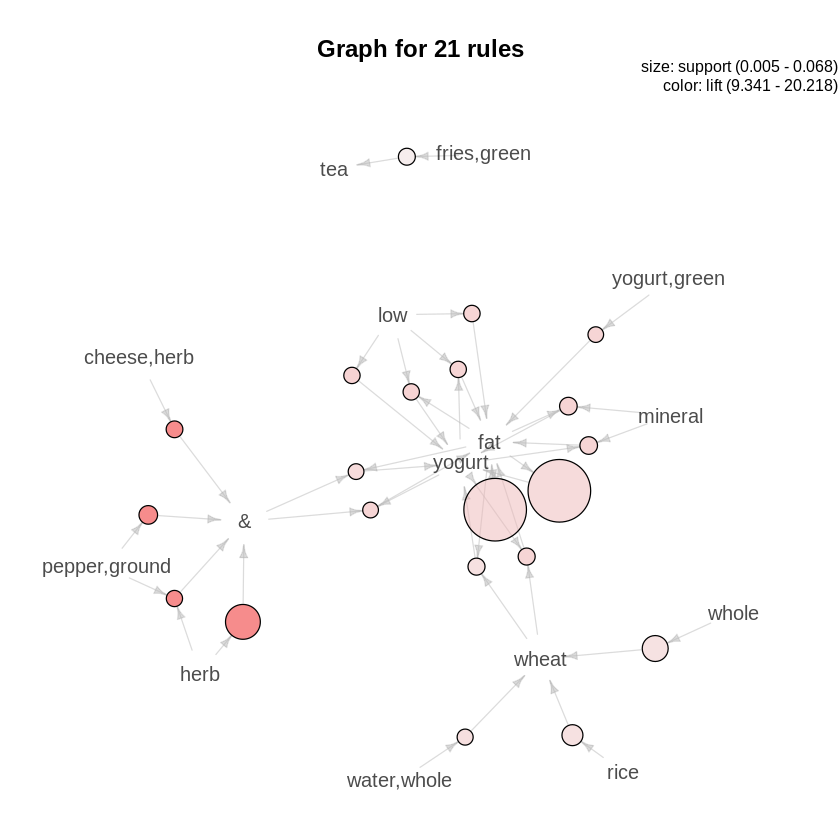

In [27]:
# association rule graphs
plot(association.rules, method="graph")

We observe from the graph that anyone who bought water rice were likely to buy wheat. 

## 5. Conclusions and recommendations.

We make the following conclusions:
1. We had the right data.
2. We identified 21 rules.
3. We had the right data.


We make the following recommendations:
1. We aim to get more rules at about 150 to be inlusive as some products are left out.
2. Test the recommendations with the rules set.
